In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot accuracy and time cost
def plot_results(results):
    # Create a DataFrame from the results
    df = pd.DataFrame(results)

    # Plot 1: Accuracy across different datasets
    plt.figure(figsize=(12, 6))
    for model in df['model'].unique():
        subset = df[df['model'] == model]
        plt.plot(subset['dataset'], subset['accuracy'], marker='o', label=model)

        # Annotate each point with its accuracy value
        for i, row in subset.iterrows():
            plt.text(row['dataset'], row['accuracy'] + 1, f"{row['accuracy']:.2f}%", 
                     ha='center', va='bottom', fontsize=12, color='green')  # Accuracy annotation

    # Adding titles and labels for accuracy plot
    plt.title('Accuracy across Different Datasets\n\n')
    plt.xlabel('Datasets')
    plt.ylabel('Accuracy (%)')
    plt.xticks(rotation=45)
    plt.ylim(0, 110)  # Set y-axis limits to 0 - 100
    plt.legend(title='Model')
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Plot 2: Time cost (Training and Testing time)
    plt.figure(figsize=(12, 6))

    # Bar plot for training time
    plt.subplot(1, 2, 1)
    for model in df['model'].unique():
        subset = df[df['model'] == model]
        plt.bar(subset['dataset'], subset['train_time'], label=model, alpha=0.7)

    # Adding titles and labels for training time
    plt.title('Training Time across Different Datasets')
    plt.xlabel('Datasets')
    plt.ylabel('Training Time (seconds)')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.grid()

    # Bar plot for testing time
    plt.subplot(1, 2, 2)
    for model in df['model'].unique():
        subset = df[df['model'] == model]
        plt.bar(subset['dataset'], subset['test_time'], label=model, alpha=0.7)

    # Adding titles and labels for testing time
    plt.title('Testing Time across Different Datasets')
    plt.xlabel('Datasets')
    plt.ylabel('Testing Time (seconds)')
    plt.xticks(rotation=45)
    plt.legend(title='Model')
    plt.grid()

    # Adjust layout for the time plots
    plt.tight_layout()
    plt.show()

# Example of how to call the function after storing results
# plot_results(results)


In [5]:
# DATASETS
datasets = [
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-5mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-15mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-30mins.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-1hour.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-2hours.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-4hours.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-8hours.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/data-60-1.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/data-3-1.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/5min-data.csv',
    # 'C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/all-malicious-5-mins.csv',
    'C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/all-mixed-5-mins.csv'
]

In [6]:
#  DATA Preprocessing
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# Function to extract signature and frequency from a cell
def extract_signature_and_frequency(cell):
    if isinstance(cell, str):
        try:
            # Split by comma and remove brackets to extract signature and frequency
            signature, frequency = cell.replace('[', '').replace(']', '').split(',')
            return signature.strip(), int(frequency.strip())
        except ValueError:
            return None, 0  # In case of parsing failure, return None and 0 frequency
    return None, 0

# Function to load and preprocess dataset
def load_and_preprocess_data(dataset):
    # Load the dataset
    data = pd.read_csv(dataset)
    
    # Extract all columns that start with 'Fs'
    fs_columns = [col for col in data.columns if col.startswith('Fs')]
    
    # Create a set to collect unique signatures
    signature_set = set()
    for col in fs_columns:
        # Apply extraction function to each cell in the 'Fs' columns
        data[col] = data[col].apply(lambda cell: extract_signature_and_frequency(cell))
        # Update signature_set with signatures (ignore None)
        signature_set.update([sig for sig, _ in data[col] if sig])
    
    # Sort the unique signatures to create a consistent order for columns
    signature_list = sorted(list(signature_set))
    
    # Initialize the matrix with zeros as integers; rows = samples, columns = unique signatures
    X_matrix = np.zeros((data.shape[0], len(signature_list)), dtype=int)
    
    # Populate the matrix with frequencies
    for row_idx in range(data.shape[0]):
        for col in fs_columns:
            signature, frequency = data.at[row_idx, col]
            if signature in signature_list:
                sig_idx = signature_list.index(signature)  # Get the index for the signature
                X_matrix[row_idx, sig_idx] += frequency  # Update the corresponding cell with the frequency
    
    # Extract Y labels
    y = data['Label']
    
    # Encode Y labels into unique integers
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_matrix, y_encoded, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, signature_list, label_encoder



Decision Tree Model

Dataset: C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/all-mixed-5-mins.csv
Initial Memory Usage: 186852.00 KiB
Accuracy: 96.02%
Train Time: 0.9088s
Test Time: 1.4399s
Memory Consumption During Training: 198140.00 KiB
Memory Consumption During Testing: 188040.00 KiB
Memory Usage Increase During Training: 11288.00 KiB
Memory Usage Increase During Testing: 1188.00 KiB
Model and signature list saved to Model - DCT.joblib

Label classes (mapping):
{'Attack': 0, 'Benign': 1, 'C&C': 2, 'C&C-HeartBeat': 3, 'C&C-Torii': 4, 'DDoS': 5, 'Okiru': 6, 'PortScan': 7}


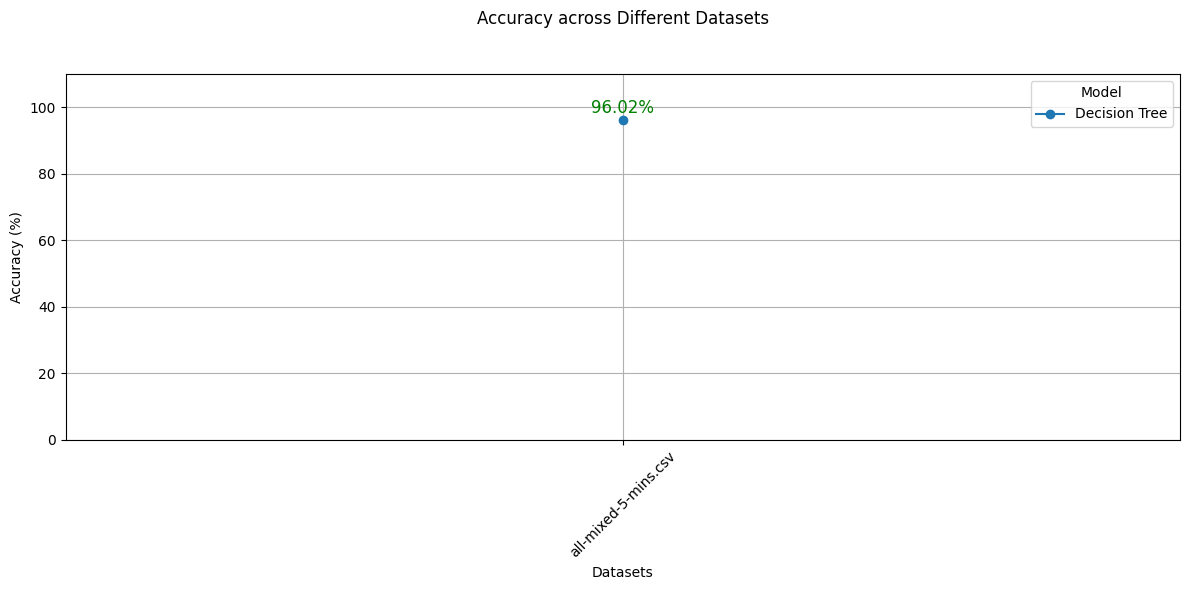

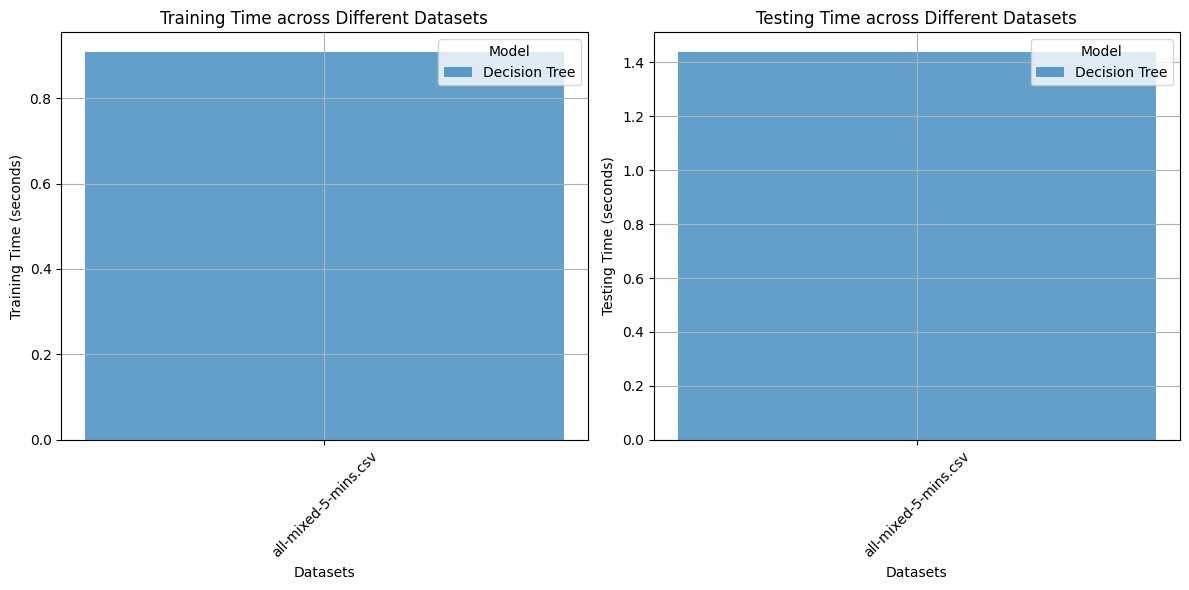

In [7]:
# Training and Test Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time
import joblib
from memory_profiler import memory_usage

start_time = time.time()
results = []

print("Decision Tree Model")

for dataset in datasets:
    print(f"\nDataset: {dataset}")

    # Load dataset
    X_train, X_test, y_train, y_test, signature_list, label_encoder = load_and_preprocess_data(dataset)

    # Decision Tree Model
    clf = DecisionTreeClassifier()

    # Measure initial memory usage
    initial_mem_usage_kib = memory_usage()[0] * 1024  # Convert to KiB
    print(f"Initial Memory Usage: {initial_mem_usage_kib:.2f} KiB")

    # Train the model
    start_train_time = time.time()
    mem_usage_train = memory_usage((clf.fit, (X_train, y_train), {}), interval=0.1, timeout=1)
    end_train_time = time.time()

    # Test the model
    start_test_time = time.time()
    mem_usage_test = memory_usage((clf.predict, (X_test,), {}), interval=0.1, timeout=1)
    end_test_time = time.time()

    # Calculate accuracy
    accuracy = accuracy_score(y_test, clf.predict(X_test))
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Train Time: {end_train_time - start_train_time:.4f}s")
    print(f"Test Time: {end_test_time - start_test_time:.4f}s")

    # Show memory consumption
    max_mem_usage_train_kib = max(mem_usage_train) * 1024
    max_mem_usage_test_kib = max(mem_usage_test) * 1024
    print(f"Memory Consumption During Training: {max_mem_usage_train_kib:.2f} KiB")
    print(f"Memory Consumption During Testing: {max_mem_usage_test_kib:.2f} KiB")

    # Calculate memory differences
    memory_diff_train = max_mem_usage_train_kib - initial_mem_usage_kib
    memory_diff_test = max_mem_usage_test_kib - initial_mem_usage_kib
    print(f"Memory Usage Increase During Training: {memory_diff_train:.2f} KiB")
    print(f"Memory Usage Increase During Testing: {memory_diff_test:.2f} KiB")

    # Save the trained model to a file with the name "Model - DCT"
    model_filename = "Model - DCT.joblib"
    # model_filename = "Model - DCT-mali.joblib"
    joblib.dump({'model': clf, 'signature_list': signature_list}, model_filename)
    print(f"Model and signature list saved to {model_filename}")

    print("\nLabel classes (mapping):")
    print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

    # Store results for plotting
    results.append({
        'dataset': dataset.split('/')[-1],  # Get just the dataset name
        'model': 'Decision Tree',
        'accuracy': accuracy * 100,
        'train_time': end_train_time - start_train_time,
        'test_time': end_test_time - start_test_time
    })

# Plot the accuracies
plot_results(results)


In [8]:
# # Print the results for validation
# print("X_train matrix:")
# print(X_train)
# print("\nX_test matrix:")
# print(X_test)
# print("\ny_train labels (encoded):")
# print(y_train)
# print("\ny_test labels (encoded):")
# print(y_test)

In [9]:
# Load & Test Model
import joblib
import pandas as pd
import numpy as np

# Load the trained model and signature list
model_filename = "C:/Users/Natty PC/Documents/Party/Project II/Models/Model - DCT.joblib"
loaded_data = joblib.load(model_filename)

# Extract the classifier (model) and signature_list
clf = loaded_data['model']  # Decision tree classifier
signature_list = loaded_data['signature_list']  # Signature list

print(f"Model and signature list loaded from {model_filename}")

# Load new data (adjust file path as necessary)
# new_data = pd.read_csv('C:/Users/Natty PC/Documents/Party/Project II/PreData/Signatures/signatures-8hours.csv')
# new_data = pd.read_csv('C:/Users/Natty PC/Documents/Party/Project II/PreData/Testing Data/test-dataset-3-1.csv')
new_data = pd.read_csv('C:/Users/Natty PC/Documents/Party/Project II/PreData/data-1k.csv')

# Preprocess new data using the same signature list
def extract_signature_and_frequency(cell):
    if isinstance(cell, str):
        try:
            signature, frequency = cell.replace('[', '').replace(']', '').split(',')
            return signature.strip(), int(frequency.strip())
        except ValueError:
            return None, 0  # Return None and 0 frequency on failure
    return None, 0

def preprocess_new_data(new_data, signature_list):
    fs_columns = [col for col in new_data.columns if col.startswith('Fs')]
    X_new = np.zeros((new_data.shape[0], len(signature_list)), dtype=int)

    for row_idx in range(new_data.shape[0]):
        for col in fs_columns:
            signature, frequency = extract_signature_and_frequency(new_data.at[row_idx, col])
            if signature in signature_list:
                sig_idx = signature_list.index(signature)
                X_new[row_idx, sig_idx] += frequency

    return X_new

# Preprocess new data
X_new = preprocess_new_data(new_data, signature_list)

# Make predictions with the loaded model
y_pred_new = clf.predict(X_new)

# Mapping from numeric labels to class names
label_mapping = {
    0: 'Attack',
    1: 'Benign',
    2: 'C&C-HeartBeat',
    3: 'DDoS',
    4: 'Okiru',
    5: 'PortScan',
    6: 'PortScan-Attack'
}

# Convert numeric predictions to class names
y_pred_labels = [label_mapping[label] for label in y_pred_new]

# Print predictions in a vertical line (column format)
print("Predictions on new data (in column format):")
for label in y_pred_labels:
    print(label)



Model and signature list loaded from C:/Users/Natty PC/Documents/Party/Project II/Models/Model - DCT.joblib
Predictions on new data (in column format):
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
Attack
A